# AirBNB Europa



In [1]:
from pathlib import Path

import csv
import time
import re

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns


%matplotlib inline

## Configuración

Fuente de datos para Europa https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset


In [2]:
data_folder = Path().cwd().parent / 'data'

europe_file = data_folder / 'airbnb_europe' / 'Aemf1.csv'

## Carga de datos

### Datos Europa

In [3]:
df = pd.read_csv(europe_file)

df.shape

(41714, 19)

## EDA

### Descripcion de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [5]:
memory_usage = df.memory_usage(deep=True)
print("--- Memory consumption ---")
print(memory_usage, end="\n\n")
print(f'{memory_usage.sum()/1024/1024:,.2f} MB')

--- Memory consumption ---
Index                              128
City                           2626023
Price                           333712
Day                            2669696
Room Type                      2962742
Shared Room                      41714
Private Room                     41714
Person Capacity                 333712
Superhost                        41714
Multiple Rooms                  333712
Business                        333712
Cleanliness Rating              333712
Guest Satisfaction              333712
Bedrooms                        333712
City Center (km)                333712
Metro Distance (km)             333712
Attraction Index                333712
Normalised Attraction Index     333712
Restraunt Index                 333712
Normalised Restraunt Index      333712
dtype: int64

12.13 MB


### Renombrando las columnas

Acostumbro usar columnas en snake case.


In [6]:
col_renaming_dict = {}
for col in df.columns:
    val = col.lower().replace(" ", "_").replace('(', '').replace(')', '')
    col_renaming_dict[col] = val
    # print(f'{col}: {val}')
    
df.rename(columns=col_renaming_dict, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         41714 non-null  object 
 1   price                        41714 non-null  float64
 2   day                          41714 non-null  object 
 3   room_type                    41714 non-null  object 
 4   shared_room                  41714 non-null  bool   
 5   private_room                 41714 non-null  bool   
 6   person_capacity              41714 non-null  float64
 7   superhost                    41714 non-null  bool   
 8   multiple_rooms               41714 non-null  int64  
 9   business                     41714 non-null  int64  
 10  cleanliness_rating           41714 non-null  float64
 11  guest_satisfaction           41714 non-null  float64
 12  bedrooms                     41714 non-null  int64  
 13  city_center_km  

### Tamano del dataframe


In [7]:
memory_usage = df.memory_usage(deep=True)
print("--- Memory consumption ---")
print(memory_usage, end="\n\n")
print(f'{memory_usage.sum()/1024/1024:,.2f} MB')

--- Memory consumption ---
Index                              128
city                           2626023
price                           333712
day                            2669696
room_type                      2962742
shared_room                      41714
private_room                     41714
person_capacity                 333712
superhost                        41714
multiple_rooms                  333712
business                        333712
cleanliness_rating              333712
guest_satisfaction              333712
bedrooms                        333712
city_center_km                  333712
metro_distance_km               333712
attraction_index                333712
normalised_attraction_index     333712
restraunt_index                 333712
normalised_restraunt_index      333712
dtype: int64

12.13 MB


In [8]:
df.describe()

,price,person_capacity,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,restraunt_index,normalised_restraunt_index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [9]:
df['city'].value_counts()

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: city, dtype: int64

In [10]:
df['day'].value_counts()

Weekday    20886
Weekend    20828
Name: day, dtype: int64

In [11]:
df['room_type'].value_counts()

Entire home/apt    28264
Private room       13134
Shared room          316
Name: room_type, dtype: int64

### Descripcion de los datos numericos

In [12]:
df.describe()

,price,person_capacity,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,restraunt_index,normalised_restraunt_index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


#### Box plots

<Axes: >

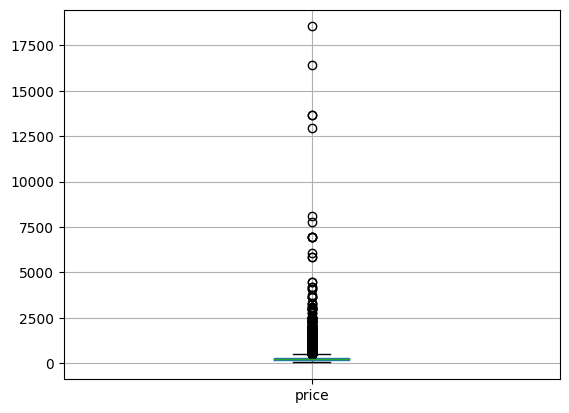

In [13]:
df.boxplot(column='price')

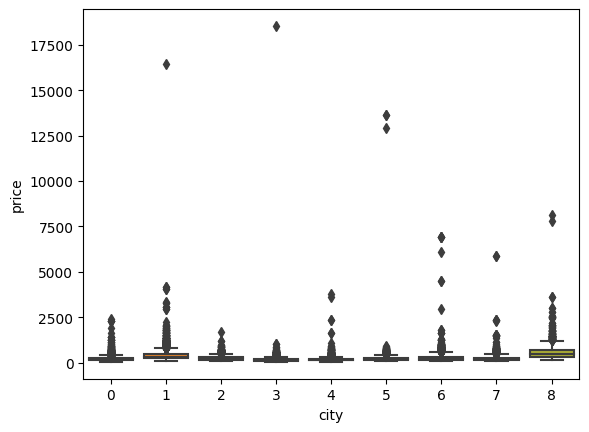

In [22]:
sns.boxplot(x="city", y="price", data=df)

plt.show()

### Matriz de Correlación

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


/tmp/ipykernel_422800/3529221622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,price,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,restraunt_index,normalised_restraunt_index
price,1.000000,-0.038231,-0.149694,0.179969,-0.040391,-0.055322,0.014206,0.003987,0.016069,0.206687,-0.052462,-0.038989,0.168785,0.270958,0.113171,0.219385
shared_room,-0.038231,1.000000,-0.059227,0.042136,-0.032852,-0.018975,0.057259,-0.049365,-0.035134,-0.022719,0.020506,-0.016123,-0.034541,0.000095,-0.033135,0.003528
private_room,-0.149694,-0.059227,1.000000,-0.475804,-0.056006,0.146854,-0.022433,-0.026518,-0.052664,-0.142468,0.133191,0.032350,0.003532,-0.000511,0.006598,-0.073959
person_capacity,0.179969,0.042136,-0.475804,1.000000,0.036633,-0.058319,0.099836,0.010089,0.017348,0.559161,-0.077547,0.008423,0.013310,-0.052291,0.021888,-0.010956
superhost,-0.040391,-0.032852,-0.056006,0.036633,1.000000,0.087061,-0.091925,0.279584,0.292312,0.023717,-0.024647,0.014925,-0.022746,-0.056138,-0.033509,-0.058594
multiple_rooms,-0.055322,-0.018975,0.146854,-0.058319,0.087061,1.000000,-0.465811,0.033897,0.040208,-0.005096,0.032846,0.035222,0.022380,-0.021696,0.024141,-0.043169
business,0.014206,0.057259,-0.022433,0.099836,-0.091925,-0.465811,1.000000,-0.076511,-0.178954,-0.022079,-0.181273,-0.066284,0.087144,0.020663,0.113270,0.089935
cleanliness_rating,0.003987,-0.049365,-0.026518,0.010089,0.279584,0.033897,-0.076511,1.000000,0.691645,0.030951,0.004794,0.019296,-0.024366,-0.041859,-0.031076,-0.047907
guest_satisfaction,0.016069,-0.035134,-0.052664,0.017348,0.292312,0.040208,-0.178954,0.691645,1.000000,0.042753,0.031176,0.025290,-0.048882,-0.024609,-0.072687,-0.047862
bedrooms,0.206687,-0.022719,-0.142468,0.559161,0.023717,-0.005096,-0.022079,0.030951,0.042753,1.000000,0.000041,0.053605,-0.015168,-0.082276,-0.016411,-0.076505


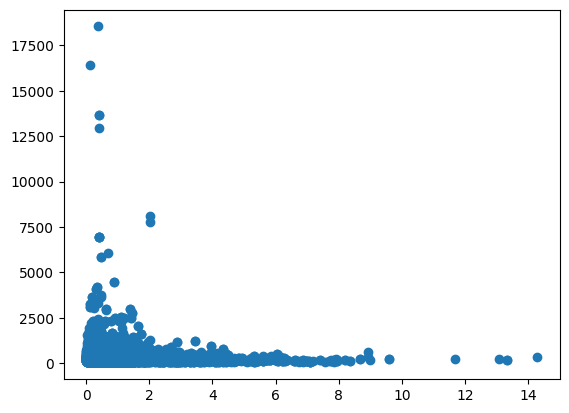

In [16]:
plt.scatter(df['metro_distance_km'], df['price'])

### Histrogramas

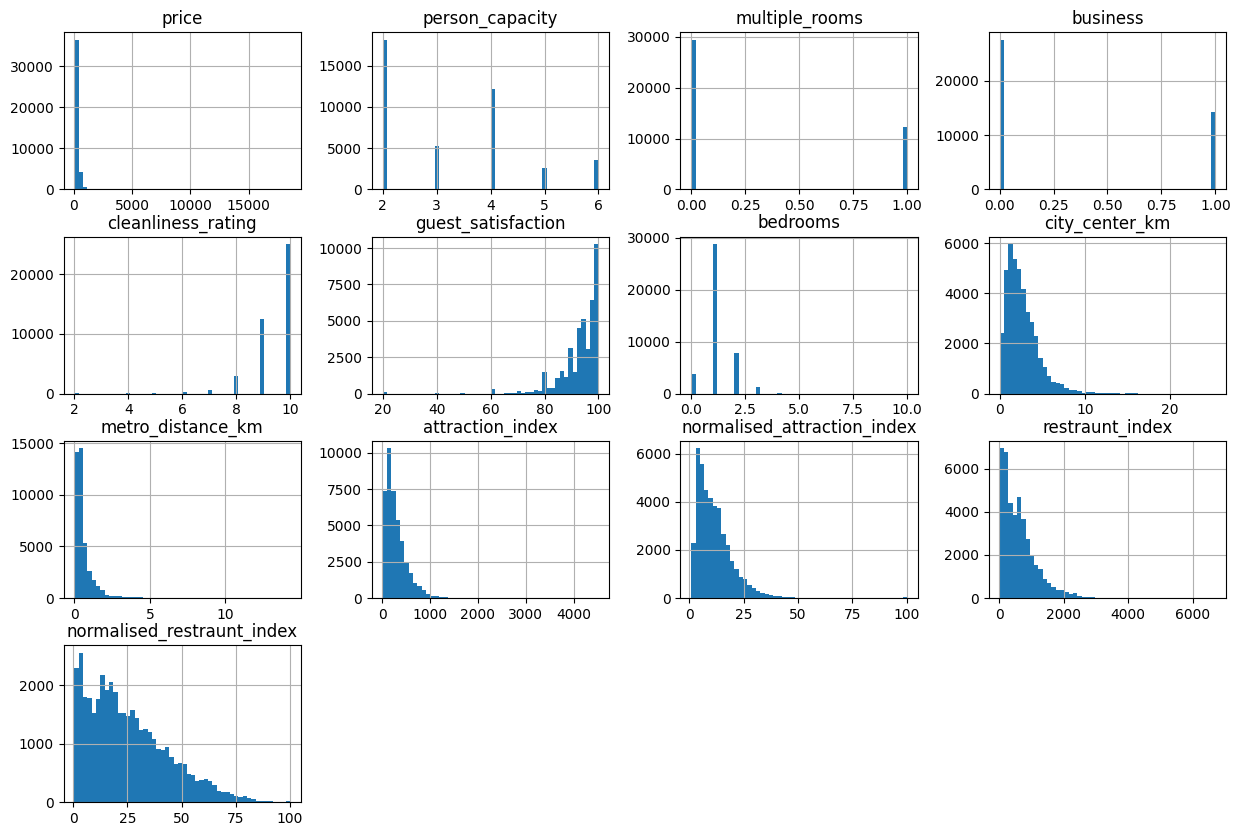

In [17]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

## Limpieza de datos

In [18]:
city_mapping = {
    'Rome': 0,
    'Paris': 1,
    'Lisbon': 2,
    'Athens': 3,
    'Budapest': 4,
    'Vienna': 5,
    'Barcelona': 6,
    'Berlin': 7,
    'Amsterdam': 8
}
df['city'] = df['city'].map(city_mapping)

In [19]:
day_mapping = {
    "Weekday": 0,
    "Weekend": 1,
}

df['day'] = df['day'].map(day_mapping)

In [20]:
room_type_mapping = {
    "Entire home/apt": 0,
    "Private room": 1,
    "Shared room": 2,
}

df['room_type'] = df['room_type'].map(room_type_mapping)